In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score

In [2]:
df=pd.read_csv('Smoker_dataset.csv')
df


,Gene2337,Gene35715,Gene12936,Gene1689,FGFR1,GATA4,type,Condition
0,-4.750470,-1.518091,6.715013,-1.722331,0.170110,-7.846961,Smoker,Cancer
1,-5.183375,0.039654,2.529460,-1.323490,-0.315844,-4.447406,Smoker,Cancer
2,1.579079,1.588153,0.569724,-1.229601,-4.119116,0.649277,Smoker,Normal
3,-1.557053,-3.818996,3.798518,-1.204911,1.010464,-6.712354,Smoker,Cancer
4,-1.329637,-3.623963,2.722249,-0.784387,1.564218,-5.580853,Smoker,Cancer
...,...,...,...,...,...,...,...,...
1018,7.703466,2.294580,2.789479,6.321373,-1.037499,7.665423,Smoker,Normal
1019,1.898735,3.909679,6.033432,7.616461,-0.808922,5.516971,Smoker,Normal
1020,3.049206,0.000000,2.874886,NaN,-1.930069,4.096234,Smoker,Normal
1021,4.849276,3.927777,3.702056,NaN,-1.430435,6.421559,Smoker,Normal


In [3]:
ar=df['type'].factorize()[0]
df['type']=ar
ar=df['Condition'].factorize()[0]
df['Condition']=ar
df

,Gene2337,Gene35715,Gene12936,Gene1689,FGFR1,GATA4,type,Condition
0,-4.750470,-1.518091,6.715013,-1.722331,0.170110,-7.846961,0,0
1,-5.183375,0.039654,2.529460,-1.323490,-0.315844,-4.447406,0,0
2,1.579079,1.588153,0.569724,-1.229601,-4.119116,0.649277,0,1
3,-1.557053,-3.818996,3.798518,-1.204911,1.010464,-6.712354,0,0
4,-1.329637,-3.623963,2.722249,-0.784387,1.564218,-5.580853,0,0
...,...,...,...,...,...,...,...,...
1018,7.703466,2.294580,2.789479,6.321373,-1.037499,7.665423,0,1
1019,1.898735,3.909679,6.033432,7.616461,-0.808922,5.516971,0,1
1020,3.049206,0.000000,2.874886,NaN,-1.930069,4.096234,0,1
1021,4.849276,3.927777,3.702056,NaN,-1.430435,6.421559,0,1


<AxesSubplot:>

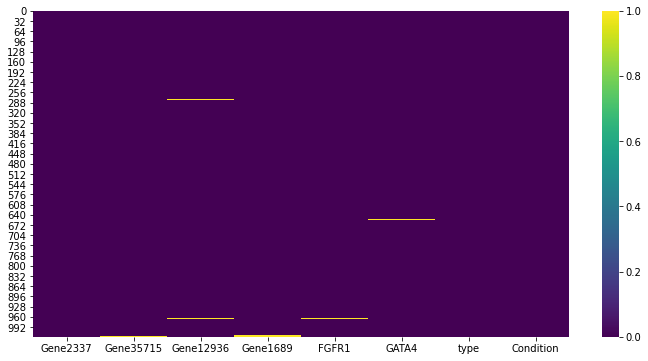

In [4]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(),cmap='viridis')

<AxesSubplot:>

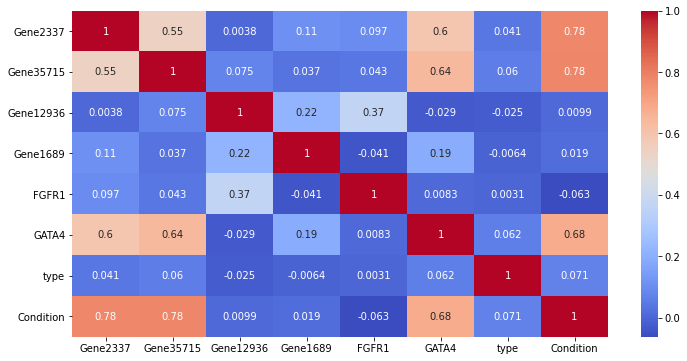

In [5]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [6]:
df.dropna(inplace=True)
df.drop(['Gene12936'],axis=1,inplace=True)

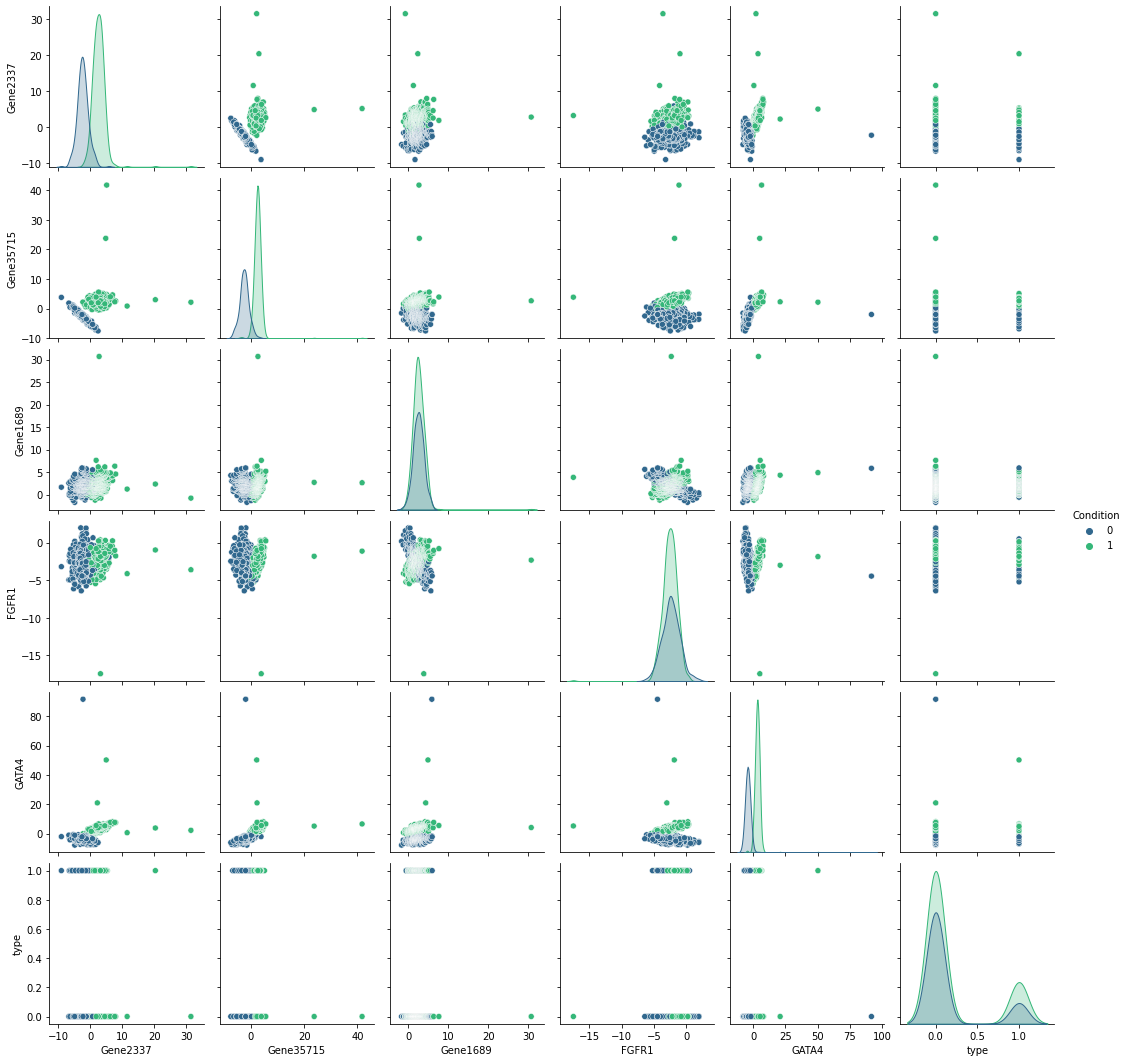

In [7]:
sns.pairplot(df,hue='Condition',palette='viridis')

<AxesSubplot:xlabel='Gene2337', ylabel='Count'>

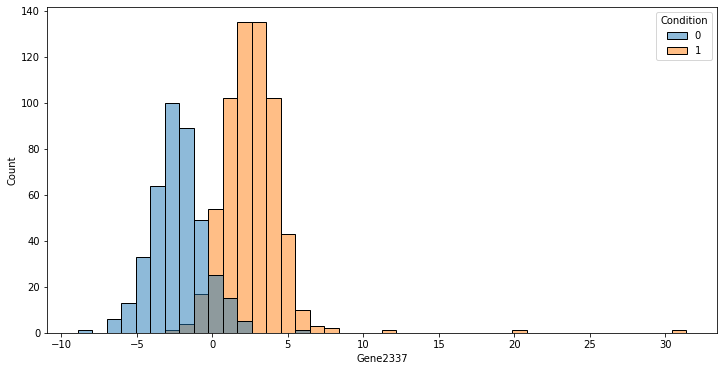

In [8]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,x='Gene2337',hue='Condition')

<AxesSubplot:xlabel='type', ylabel='count'>

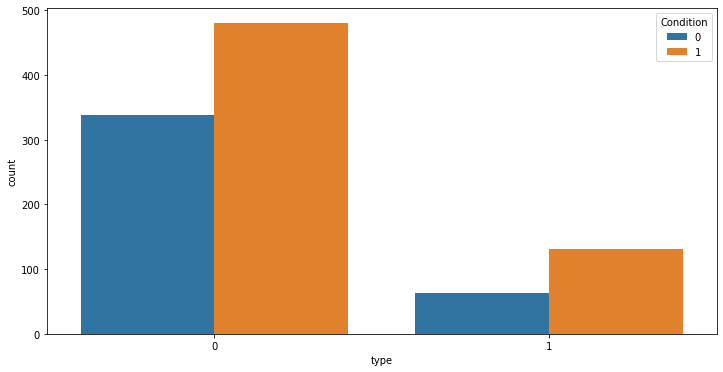

In [9]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='type',hue='Condition')

<AxesSubplot:xlabel='Condition', ylabel='count'>

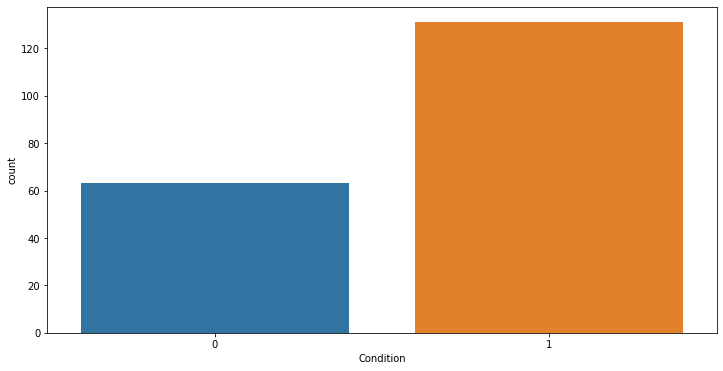

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(data=df[df['type']==1],x='Condition')

<AxesSubplot:xlabel='Condition', ylabel='count'>

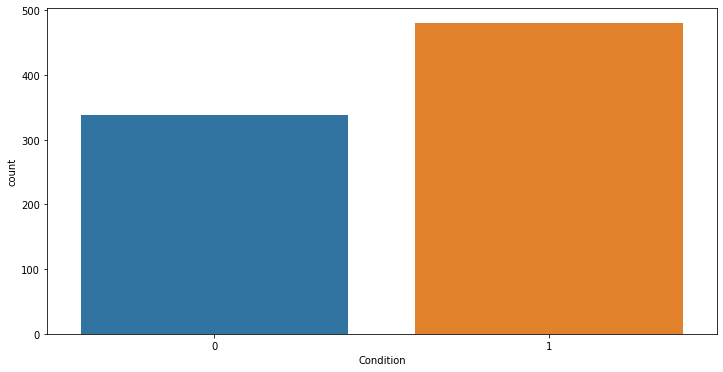

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(data=df[df['type']!=1],x='Condition')

In [12]:
x=df.drop('Condition',axis=1)
y=df['Condition']

In [13]:
def quartil(x,st):
    if x<df[st].quantile([0.25,0.5,0.75]).to_list()[0]:
        return 1
    elif x>=df[st].quantile([0.25,0.5,0.75]).to_list()[0] and x<df[st].quantile([0.25,0.5,0.75]).to_list()[1]:
        return 2
    elif x>=df[st].quantile([0.25,0.5,0.75]).to_list()[1] and x<df[st].quantile([0.25,0.5,0.75]).to_list()[2]:
        return 3
    else:
        return 4

In [14]:
df2=df.copy()
df2['Gene2337']=df2['Gene2337'].apply(quartil,st='Gene2337')
df2['Gene35715']=df2['Gene35715'].apply(quartil,st='Gene35715')
df2['Gene1689']=df2['Gene1689'].apply(quartil,st='Gene1689')
df2['GATA4']=df2['GATA4'].apply(quartil,st='GATA4')
df2['FGFR1']=df2['FGFR1'].apply(quartil,st='FGFR1')
x1=df2.drop(['Condition'],axis=1)

In [15]:
kfold=KFold(n_splits=5,shuffle=True)
scaler=StandardScaler()
scaler.fit(x)
x_norm=scaler.transform(x)
a=[]
d=[]
e=[]

In [16]:
a.append(cross_val_score(LogisticRegression(),x_norm,y,cv=kfold,scoring='accuracy',n_jobs=-1))
d.append(cross_val_score(LogisticRegression(),x_norm,y,cv=kfold,scoring='f1_weighted',n_jobs=-1))
e.append(cross_val_score(LogisticRegression(),x_norm,y,cv=kfold,scoring='roc_auc',n_jobs=-1))

In [17]:
a.append(cross_val_score(MultinomialNB(),x1,y,cv=kfold,scoring='accuracy',n_jobs=-1))
d.append(cross_val_score(MultinomialNB(),x1,y,cv=kfold,scoring='f1_weighted',n_jobs=-1))
e.append(cross_val_score(MultinomialNB(),x1,y,cv=kfold,scoring='roc_auc',n_jobs=-1))

In [18]:
param_grid={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['rbf']}
grid=GridSearchCV(SVC(),param_grid,refit=True,n_jobs=-1)
grid.fit(x_norm,y)
a.append(cross_val_score(SVC(C=grid.best_params_['C'],gamma=grid.best_params_['gamma'],kernel=grid.best_params_['kernel']),x_norm,y,cv=kfold,scoring='accuracy',n_jobs=-1))
d.append(cross_val_score(SVC(C=grid.best_params_['C'],gamma=grid.best_params_['gamma'],kernel=grid.best_params_['kernel']),x_norm,y,cv=kfold,scoring='f1_weighted',n_jobs=-1))
e.append(cross_val_score(SVC(C=grid.best_params_['C'],gamma=grid.best_params_['gamma'],kernel=grid.best_params_['kernel'],probability=True),x_norm,y,cv=kfold,scoring='roc_auc',n_jobs=-1))


In [19]:
a.append(cross_val_score(DecisionTreeClassifier(),x,y,cv=kfold,scoring='accuracy',n_jobs=-1))
d.append(cross_val_score(DecisionTreeClassifier(),x,y,cv=kfold,scoring='f1_weighted',n_jobs=-1))
e.append(cross_val_score(DecisionTreeClassifier(),x,y,cv=kfold,scoring='roc_auc',n_jobs=-1))


In [20]:
b=[]
num_max=0
max_pos=0
for i in range(1,50):
    c=cross_val_score(KNeighborsClassifier(i),x_norm,y,cv=kfold,scoring='accuracy',n_jobs=-1).mean()
    b.append(c)
    if c>num_max:
        num_max=c
        max_pos=i
a.append(cross_val_score(KNeighborsClassifier(max_pos),x_norm,y,cv=kfold,scoring='accuracy',n_jobs=-1))
d.append(cross_val_score(KNeighborsClassifier(max_pos),x_norm,y,cv=kfold,scoring='f1_weighted',n_jobs=-1))
e.append(cross_val_score(KNeighborsClassifier(max_pos),x_norm,y,cv=kfold,scoring='roc_auc',n_jobs=-1))

In [21]:
a.append(cross_val_score(RandomForestClassifier(),x,y,cv=kfold,scoring='accuracy',n_jobs=-1))
d.append(cross_val_score(RandomForestClassifier(),x,y,cv=kfold,scoring='f1_weighted',n_jobs=-1))
e.append(cross_val_score(RandomForestClassifier(),x,y,cv=kfold,scoring='roc_auc',n_jobs=-1))

In [22]:
df1=pd.DataFrame(a,index=['Regressão Logística','Naive Bayes','SVC','Árvore de decisão','KNN','Florestas aleatórias']).transpose()
df2=pd.DataFrame(d,index=['Regressão Logística','Naive Bayes','SVC','Árvore de decisão','KNN','Florestas aleatórias']).transpose()
df3=pd.DataFrame(e,index=['Regressão Logística','Naive Bayes','SVC','Árvore de decisão','KNN','Florestas aleatórias']).transpose()

In [23]:
dash=pd.DataFrame([df1.mean(),df2.mean(),df3.mean(),df1.std(),df2.std(),df3.std()],index=['Média da Acurácia','Média do F1','Média do AUC','STD da Acurácia','STD do F1','STD do AUC']).transpose()
dash

,Média da Acurácia,Média do F1,Média do AUC,STD da Acurácia,STD do F1,STD do AUC
Regressão Logística,0.992094,0.992100,0.991291,0.007507,0.004398,0.007016
Naive Bayes,0.917949,0.903550,0.988124,0.049260,0.034387,0.008609
SVC,0.993084,0.993087,0.992971,0.002703,0.005624,0.008999
Árvore de decisão,0.986158,0.980240,0.983906,0.007348,0.011594,0.011427
KNN,0.993084,0.993075,0.994757,0.005619,0.005648,0.001964
Florestas aleatórias,0.992089,0.989124,0.992978,0.004422,0.010737,0.008159


In [24]:
clas=pd.DataFrame([pd.Series(dash.sort_values('Média da Acurácia',axis=0,ascending=False).index),pd.Series(dash.sort_values('Média do F1',axis=0,ascending=False).index),pd.Series(dash.sort_values('Média do AUC',axis=0,ascending=False).index)],index=['Média da Acurácia','Média do F1','Média do AUC'],).transpose()
clas=clas.reset_index()
clas['index']=clas['index'].apply(lambda x:x+1)
clas.set_index('index')

,Média da Acurácia,Média do F1,Média do AUC
index,,,
1,SVC,SVC,KNN
2,KNN,KNN,Florestas aleatórias
3,Regressão Logística,Regressão Logística,SVC
4,Florestas aleatórias,Florestas aleatórias,Regressão Logística
5,Árvore de decisão,Árvore de decisão,Naive Bayes
6,Naive Bayes,Naive Bayes,Árvore de decisão


In [25]:
dash2=pd.melt(dash.reset_index(),id_vars='index')
dash2=dash2.iloc[:18]
dash2=dash2.rename(columns={'index':'Algoritmo','variable':'Métrica','value':'Valor'})

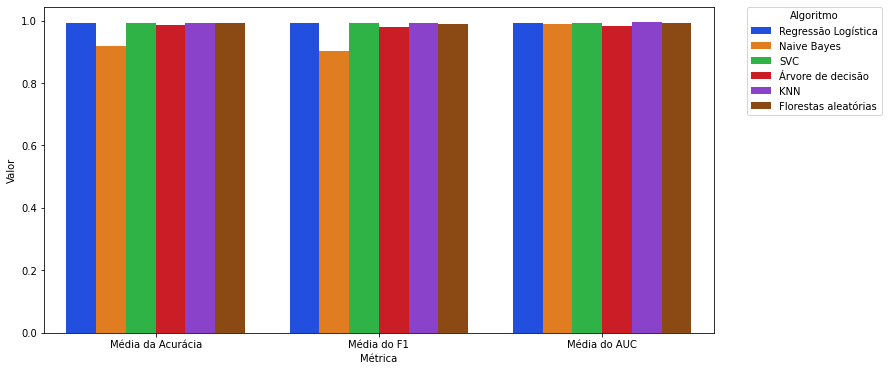

In [26]:
plt.figure(figsize=(12,6))
sns.barplot(data=dash2,hue='Algoritmo',x='Métrica',y='Valor',palette='bright')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title='Algoritmo')

In [27]:
g=[]
for i in range(0,20):
    b=[]
    num_max=0
    max_pos=0
    for i in range(1,50):
        c=cross_val_score(KNeighborsClassifier(i),x_norm,y,cv=kfold,scoring='accuracy',n_jobs=-1).mean()
        b.append(c)
        if c>num_max:
            num_max=c
            max_pos=i
    g.append(max_pos) 
g


[41, 17, 21, 18, 9, 22, 14, 13, 20, 19, 30, 17, 24, 34, 34, 11, 7, 30, 27, 24]